# Project Description

The mobile operator “Megaline” figured out that many customers use archive tariffs. They want to build a system capable of analyzing customer behavior and offering users a new tariff: "Smart" or "Ultra". 
We have a data on the behavior of customers who have already switched to these tariffs. We need to build a model for the classification problem that will choose the appropriate tariff. The dataset is already prepared for the analyzing.
We must build the model with the maximum accuracy value. Also, we will check the accuracy on the test sample. 
Accuracy is a metric in machine learning for analyzing the quality of built model. 


# The plan of project
1.	We open the data set in the file "users_behavior.csv". 
2.	We are analyzing the dataset and the find out how to divide the data set to the training, validation, and test samples.
3.	We explore the quality of different kinds of models by changing the hyperparameters. 
4.	We check the quality if chosen model on the test sample. 
5.	Additionally, we will check the model for sanity, 


# Dataset description
Each object in the dataset is information about the behavior of one user per month. Is known:
* calls — number of calls,
* minutes - total duration of calls in minutes,
* messages — the number of SMS messages, 
* mb_used - consumed Internet traffic in MB,
* is_ultra - what tariff was used during the month ("Ultra" - 1, "Smart" - 0).

# Primary data analysis

Firstly, we are importing all the libraries, that we will need:

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In the variable df, we get a table in which the data described in the task is collected.  
At this step, it is already possible to understand that we will take the is_ultra column for target, and all the remaining features for features.

In [7]:
df = pd.read_csv('users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Next, we determine the multiplicativity of the features using the Pearson correlation coefficient. We identify whether there are any signs that strongly depend on each other, which can greatly complicate the further construction of the model

Pearson coeficient:  0.20695463812169504


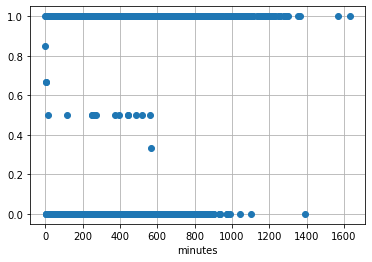

In [8]:
df.groupby('minutes')['is_ultra'].mean().plot(x = 'minutes', y = 'is_ultra', style = 'o', grid = True)
print('Pearson coeficient: ',df['is_ultra'].corr(df['minutes']))

Pearson coeficient:  0.2071215589860754


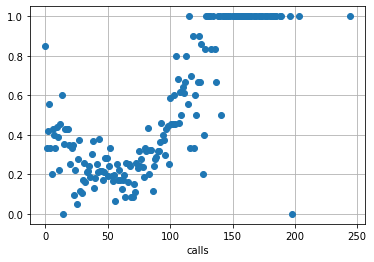

In [9]:
df.groupby('calls')['is_ultra'].mean().plot(x = 'calls', y = 'is_ultra', style = 'o', grid = True)
print('Pearson coeficient: ',df['is_ultra'].corr(df['calls']))

Pearson coeficient:  0.2038298385355361


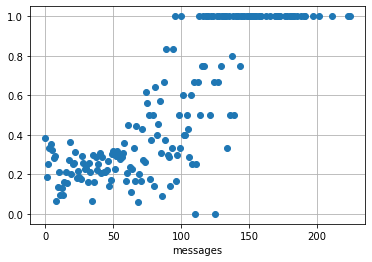

In [10]:
df.groupby('messages')['is_ultra'].mean().plot(x = 'messages', y = 'is_ultra', style = 'o', grid = True)
print('Pearson coeficient: ',df['is_ultra'].corr(df['messages']))

Pearson coeficient:  0.19856764561974238


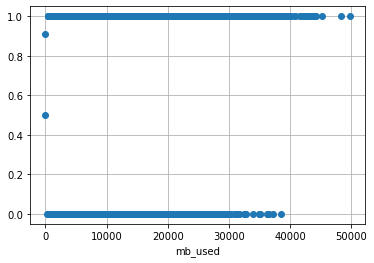

In [11]:
df.groupby('mb_used')['is_ultra'].mean().plot(x = 'mb_used', y = 'is_ultra', style = 'o', grid = True)
print('Pearson coeficient: ',df['is_ultra'].corr(df['mb_used']))

Summing up, let's build a general table:

<AxesSubplot:>

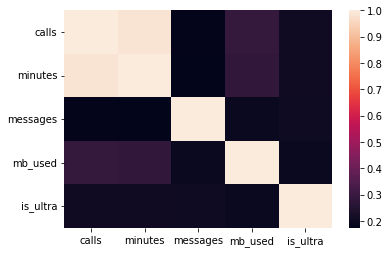

In [12]:
df.corr()
sns.heatmap(df.corr())

Having looked at the relationship between the signs, it is very clear that the biggest relationship between the indicators is calls and minutes. You can try to remove exactly one of these parameters. After excluding the minutes attribute, accuracy indicators for all models increased.

Next, we will check the abnormal values in the tariff membership column:

In [14]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

There are no abnormal values in the attribute of belonging to the tariff. We can continue analyze and dividend our dataset into the samples.

## Dividing data into samples

We divide the data into three samples: training (for training the model), validation and test. Approximately in the ratio of 3:1:1.

In [15]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345)
df_valid, df_test =  train_test_split(df_valid, test_size=0.5, random_state=12345)

print('Size of trainig sample:', df_train.shape[0])
print('Size of validation sample:', df_valid.shape[0])
print('Size of test sample:', df_test.shape[0])

Size of trainig sample: 1928
Size of validation sample: 643
Size of test sample: 643


We also divide each sample into target and attributes

In [16]:
features_train = df_train.drop(['is_ultra', 'minutes'], axis = 1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra', 'minutes'], axis = 1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra', 'minutes'], axis = 1)
target_test = df_test['is_ultra']

## Trying different types of models

### Model Decision Tree Classifier

In [17]:
max_depth = 0
best_acc_des_tree = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)  
    result = accuracy_score(target_valid, predictions_valid)
    if result > best_acc_des_tree:
        best_acc_des_tree = result
        max_depth = depth
print("for the model DecisionTreeClassifier")
print("Max_depth = ", max_depth)
print("Best accuracy = ", best_acc_des_tree)

for the model DecisionTreeClassifier
Max_depth =  5
Best accuracy =  0.7900466562986003


### Model of Random Forest Classifier

In [19]:
best_est = 0
best_depth = 0
best_result_rand_tree = 0
for est in range(10, 101, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result_rand_tree:        
            best_est = est
            best_depth = depth
            best_result_rand_tree = result
print("for the best model of RandomForestClassifier")
print("Best estimators = ", best_est)
print("Best depth = ", best_depth)
print("Best accuracy = ", best_result_rand_tree)

for the best model of RandomForestClassifier
Best estimators =  30
Best depth =  6
Best accuracy =  0.7962674961119751


### Model Logic Regression

In [20]:
model = LogisticRegression(random_state=12345) 
model.fit(features_train, target_train) 
result = model.score(features_valid, target_valid) 

print("for the model LogisticRegression")
print("Best accuracy = ", result)

for the model LogisticRegression
Best accuracy =  0.7076205287713841


## Conclusions

After analyzing all three types of models, we can conclude that:

* For a **decision tree** model with 7 trees, **accuracy = 0.8055987558320373**
* For a **random forest** model with 41 trees, **accuracy = 0.8569206842923794**
* For a **logical regression** model, **accuracy = 0.7589424572317263**

Thus, it is worth choosing a **random forest model with the parameter n_extimators = 41.**


## Checking the Accuracy on the test sample

In [21]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=12345)
features_train = df_train.drop(['is_ultra', 'minutes'],  axis = 1)
target_train = df_train['is_ultra']


features_test = df_test.drop(['is_ultra', 'minutes'], axis = 1)
target_test = df_test['is_ultra']


model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth = 6)
model.fit(features_train, target_train) 
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print("Accuracy for the test sample is ", accuracy)

Accuracy for the test sample is  0.8009950248756219


We have received a very high value of accuracy, which indicates the high quality of the model we have chosen.  
Additionally, we need to check the adequacy of our model. Let's look at the percentage of the number of users of each tariff


In [23]:
df['is_ultra'].value_counts(normalize = True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

It turns out that the Smart tariff accounts for much more percent - 69%. If our model was not very adequate and predicted the same value every time (at best, "Smart"), then we would be in 69% of cases. Our model showed a result of 79.6%, which is significantly more. So our model is quite adequate

## Conclusion

In this project, it was necessary to train a model to predict the choice of a tariff by users depending on several parameters. To begin with, the dependencies of the tariff choice on various indicators (number of calls, megabytes of Internet, etc.) were studied, during the study and testing of various options, the greatest accuracy was obtained when all the parameters presented initially in the table were taken into account.

Further, during the project, 3 variants of model training were tested - the decision tree model, the random forest model and the logical regression model. After studying the results of each of the models. The most successful was the random forest model, which showed an accuracy result equal to 8.5. Next, this model was tested on a testing sample (combined testing, left initially, and validation), showing a result of 7.92. In addition, the model was tested for adequacy
